# Dogs vs Cats

This is a CNN based model to differentiate between images of dogs and cats as applied on the dataset of the "Dogs vs Cats" Kaggle competition. It uses the FastAI librry and transfers learning from a ResNet34 model. The model is trained using stochastic gradient descent with restarts and different learning rates are used for different layers. 

### Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

sz is the size that the images will be resized to in order to ensure that the training runs quickly. 

In [3]:
PATH = "data/dogscats/"
sz=224

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

The following two sets of commands should be executed on a Crestle setup, They create symlinks to the data files.

In [6]:
 os.makedirs('data/dogscats/models', exist_ok=True)

 !ln -s /datasets/fast.ai/dogscats/train {PATH}
 !ln -s /datasets/fast.ai/dogscats/test {PATH}
 !ln -s /datasets/fast.ai/dogscats/valid {PATH}

 os.makedirs('/cache/tmp', exist_ok=True)
 !ln -fs /cache/tmp {PATH}

In [7]:
 os.makedirs('/cache/tmp', exist_ok=True)
 !ln -fs /cache/tmp {PATH}

In [8]:
os.listdir(PATH)

['test', 'valid', 'models', 'train', 'tmp']

In [9]:
os.listdir(f'{PATH}valid')

['dogs', 'cats']

In [10]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.7875.jpg',
 'cat.2153.jpg',
 'cat.9099.jpg',
 'cat.1460.jpg',
 'cat.4689.jpg']

The model will assume that the images are kept in train and valid directories with each directory having subfolders for each class (i.e. dogs and cats).

### First build

We use a pre-trained model (resnet34) that is trained on ImageNet. Uncomment next command to reset precomputed activations.

In [ ]:
# shutil.rmtree(f'{PATH}tmp', ignore_errors=True)

arch is the architecture of CNN, in this case resnet34
In learn.fit, first parameter is the learning rate, second parameter is number of epochs i.e. how many times the model will scan each of the images.
ImageClassifierData.from_paths reads data from a provided path and creates a dataset ready for training.
tfms_from_model takes care of resizing, image cropping, initial normalization (creating data with (mean,stdev) of (0,1))
ConvLearner.pretrained builds learner that contains a pre-trained model. The last layer of the model needs to be replaced with the layer of the right dimensions (2 in this case)

In [11]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/nbuser/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 104893811.61it/s]


  0%|          | 0/360 [00:00<?, ?it/s]

/home/nbuser/courses/fastai/courses/dl1/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


100%|██████████| 32/32 [00:11<00:00,  2.71it/s]


  0%|          | 0/360 [00:00<?, ?it/s]

/home/nbuser/courses/fastai/courses/dl1/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


 16%|█▌        | 58/360 [00:03<00:17, 16.90it/s, loss=tensor(1.00000e-02 *e='cuda:0')]
 16%|█▌        | 58/360 [00:03<00:18, 16.71it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 61/360 [00:03<00:17, 17.56it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 61/360 [00:03<00:17, 17.38it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 61/360 [00:03<00:17, 17.20it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 61/360 [00:03<00:17, 17.02it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 64/360 [00:03<00:16, 17.83it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 64/360 [00:03<00:16, 17.62it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 64/360 [00:03<00:16, 17.45it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 64/360 [00:03<00:17, 17.27it/s, loss=tensor(1.00000e-02 *
 19%|█▊        | 67/360 [00:03<00:16, 18.06it/s, loss=tensor(1.00000e-02 *
 19%|█▊        | 67/360 [00:03<00:16, 17.89it/s, loss=tensor(1.00000e-02 *
 19%|█▊        | 67/360 [00:03<00:16, 17.72it/s, loss=tensor(1.00000e-02 *
 19%|█▊      

 42%|████▏     | 151/360 [00:05<00:07, 28.87it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:05<00:07, 28.68it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:05<00:07, 28.46it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:05<00:07, 28.22it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:05<00:07, 28.02it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:05<00:07, 27.87it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:05<00:07, 27.70it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:05<00:07, 27.47it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:05<00:07, 27.23it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:05<00:07, 27.09it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:05<00:07, 26.86it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:05<00:07, 26.66it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:05<00:07, 26.51it/s, loss=tensor(1.00000e-02 *
 46%|████▌  

 70%|███████   | 253/360 [00:06<00:02, 38.81it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 38.78it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 38.75it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 38.72it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 38.70it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 38.67it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 38.65it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 38.62it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 38.59it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 38.57it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 38.54it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 38.52it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 38.49it/s, loss=tensor(1.00000e-02 *
 70%|███████

 96%|█████████▌| 345/360 [00:06<00:00, 49.42it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 345/360 [00:06<00:00, 49.39it/s, loss=tensor(1.00000e-02 *
epoch      trn_loss   val_loss   accuracy                                                                   
    0      0.045151   0.023763   0.991699  
  0%|          | 0/360 [00:00<?, ?it/s, loss=tensor(1.00000e-02 *
  0%|          | 1/360 [00:00<01:04,  5.60it/s, loss=tensor(1.00000e-02 *
  0%|          | 1/360 [00:00<01:17,  4.64it/s, loss=tensor(1.00000e-02 *
  0%|          | 1/360 [00:00<01:33,  3.85it/s, loss=tensor(1.00000e-02 *
  0%|          | 1/360 [00:00<01:47,  3.34it/s, loss=tensor(1.00000e-02 *
  1%|          | 4/360 [00:00<00:26, 13.21it/s, loss=tensor(1.00000e-02 *
  1%|          | 4/360 [00:00<00:30, 11.75it/s, loss=tensor(1.00000e-02 *
  1%|          | 4/360 [00:00<00:33, 10.62it/s, loss=tensor(1.00000e-02 *
  1%|          | 4/360 [00:00<00:36,  9.64it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 7/360 [00:00<00:21, 

 22%|██▏       | 79/360 [00:03<00:12, 23.29it/s, loss=tensor(1.00000e-02 *
 22%|██▏       | 79/360 [00:03<00:12, 23.01it/s, loss=tensor(1.00000e-02 *
 22%|██▏       | 79/360 [00:03<00:12, 22.76it/s, loss=tensor(1.00000e-02 *
 23%|██▎       | 82/360 [00:03<00:11, 23.58it/s, loss=tensor(1.00000e-02 *
 23%|██▎       | 82/360 [00:03<00:11, 23.26it/s, loss=tensor(1.00000e-02 *
 23%|██▎       | 82/360 [00:03<00:12, 22.99it/s, loss=tensor(1.00000e-02 *
 23%|██▎       | 82/360 [00:03<00:12, 22.76it/s, loss=tensor(1.00000e-02 *
 24%|██▎       | 85/360 [00:03<00:11, 23.57it/s, loss=tensor(1.00000e-02 *
 24%|██▎       | 85/360 [00:03<00:11, 23.33it/s, loss=tensor(1.00000e-02 *
 24%|██▎       | 85/360 [00:03<00:11, 23.06it/s, loss=tensor(1.00000e-02 *
 24%|██▎       | 85/360 [00:03<00:12, 22.85it/s, loss=tensor(1.00000e-02 *
 24%|██▍       | 88/360 [00:03<00:11, 23.62it/s, loss=tensor(1.00000e-02 *
 24%|██▍       | 88/360 [00:03<00:11, 23.41it/s, loss=tensor(1.00000e-02 *
 24%|██▍       | 88/360 [

 73%|███████▎  | 262/360 [00:06<00:02, 39.83it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [00:06<00:02, 39.81it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [00:06<00:02, 39.78it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [00:06<00:02, 39.75it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [00:06<00:02, 39.73it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [00:06<00:02, 39.70it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [00:06<00:02, 39.68it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [00:06<00:02, 39.65it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [00:06<00:02, 39.62it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [00:06<00:02, 39.60it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [00:06<00:02, 39.57it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [00:06<00:02, 39.55it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [00:06<00:02, 39.52it/s, loss=tensor(1.00000e-02 *
 73%|███████

[0.024003625, 0.9921875]

In the above output, {0,1,2} denote the epoch number. This is followed by the training set loss, validation set loss and accuracy

In [12]:
data.classes

['cats', 'dogs']

Predictions are in log scale

In [13]:
log_preds = learn.predict()
log_preds.shape

(2000, 2)

Converting from log probabilities to 0 or 1

In [14]:
preds = np.argmax(log_preds, axis=1)  
probs = np.exp(log_preds[:,1])    

In [15]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [16]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [17]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [18]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [ ]:
A few incorrect labels at random

Incorrectly classified


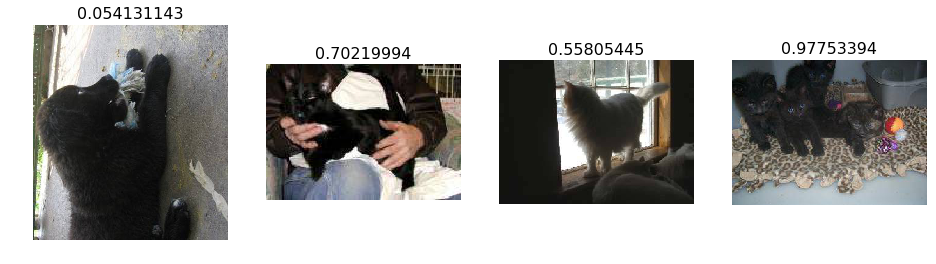

In [19]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [20]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


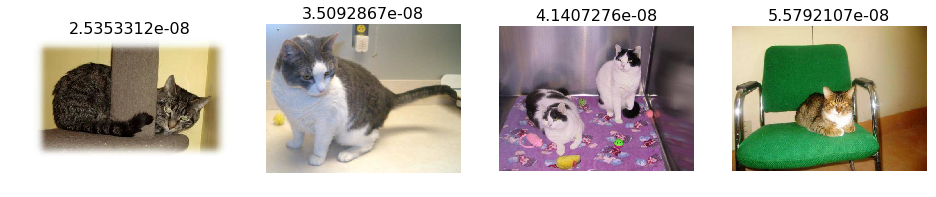

In [21]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most incorrect cats


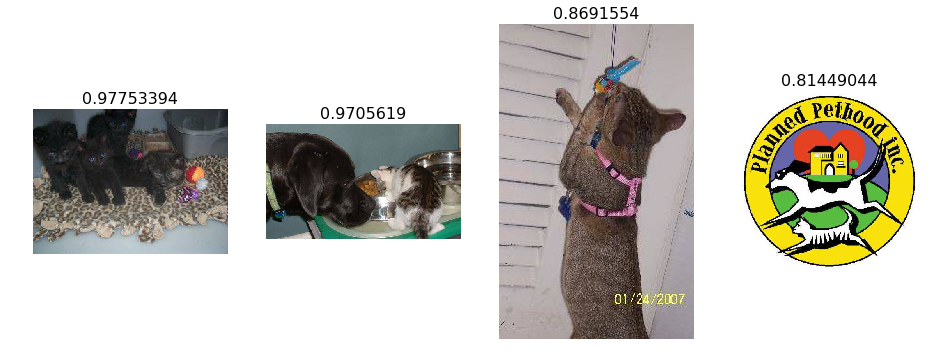

In [22]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


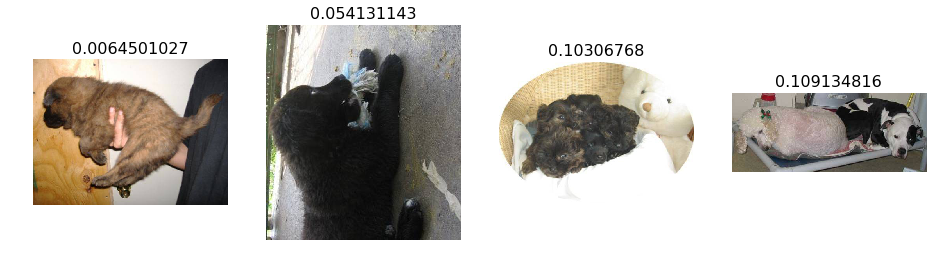

In [23]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


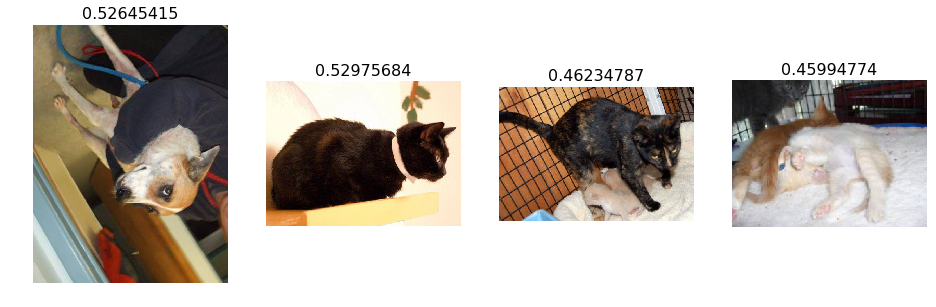

In [24]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

#### Optimizing the Learning rate

learn.lr_find() helps find an optimal learning rate. We keep increasing the learning rate from a very small value, until the loss stops decreasing. First create a a new learner, since we want to know how to set the learning rate for a new (untrained) model.

In [25]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

/home/nbuser/courses/fastai/courses/dl1/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


  1%|          | 4/360 [00:00<00:31, 11.45it/s, loss=tensor(1.1618, device='cuda:0')]

/home/nbuser/courses/fastai/courses/dl1/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


 80%|████████  | 288/360 [00:06<00:01, 42.62it/s, loss=tensor(0.4230, device='cuda:0')]


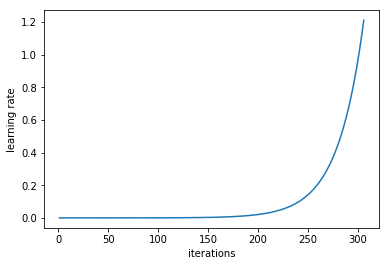

In [26]:
lrf=learn.lr_find()
learn.sched.plot_lr()

Here iteration is one iteration (or minibatch) of SGD. In one epoch there are num_train_samples/num_iterations) of SGD. We choose lr=1e-2 (0.01) i.e. the highest rate at which the loss continues to decrease. If training loss is lower than validation loss that means there is overfitting.

### Data Augmentation

To prevent overfitting we randomly change the images in ways that should not impact their interpretation, such as horizontal flipping, zooming, and rotating. Thus we effectively create more data. We can do this by passing aug_tfms (augmentation transforms) to tfms_from_model, with a list of functions to apply that randomly change the image however we wish.  For side on transformation (horizontal flipping) use transforms_side_on, for photos taken top down (satellite imagery) use transforms_top_down. Another option that specifies random zooming of images up to specified scale uses the max_zoom parameter.

In [27]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [28]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1) #bs is for batch size
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [29]:
ims = np.stack([get_augs() for i in range(6)])

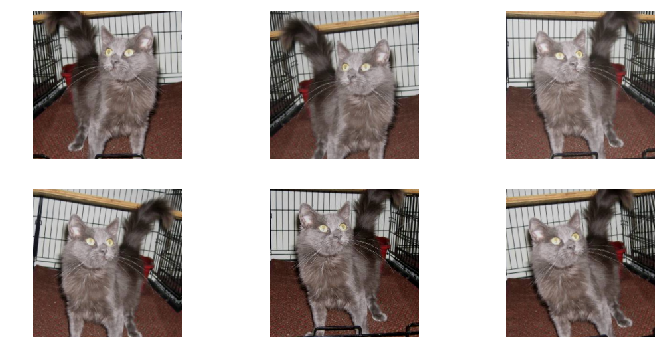

In [30]:
plots(ims, rows=2)

Creating a new data object that includes this augmentation in the transforms.

In [31]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

/home/nbuser/courses/fastai/courses/dl1/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


In [32]:
learn.fit(1e-2, 1)

  1%|          | 4/360 [00:00<00:28, 12.30it/s, loss=tensor(0.6634, device='cuda:0')]

/home/nbuser/courses/fastai/courses/dl1/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


 17%|█▋        | 61/360 [00:02<00:13, 22.90it/s, loss=tensor(1.00000e-02 *e='cuda:0')]
 17%|█▋        | 61/360 [00:02<00:13, 22.54it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 64/360 [00:02<00:12, 23.60it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 64/360 [00:02<00:12, 23.21it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 64/360 [00:02<00:12, 22.90it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 64/360 [00:02<00:13, 22.56it/s, loss=tensor(1.00000e-02 *
 19%|█▊        | 67/360 [00:02<00:12, 23.59it/s, loss=tensor(1.00000e-02 *
 19%|█▊        | 67/360 [00:02<00:12, 23.25it/s, loss=tensor(1.00000e-02 *
 19%|█▊        | 67/360 [00:02<00:12, 22.96it/s, loss=tensor(1.00000e-02 *
 19%|█▊        | 67/360 [00:02<00:12, 22.69it/s, loss=tensor(1.00000e-02 *
 19%|█▉        | 70/360 [00:02<00:12, 23.68it/s, loss=tensor(1.00000e-02 *
 19%|█▉        | 70/360 [00:02<00:12, 23.40it/s, loss=tensor(1.00000e-02 *
 19%|█▉        | 70/360 [00:03<00:12, 23.12it/s, loss=tensor(1.00000e-02 *
 19%|█▉      

 64%|██████▍   | 230/360 [00:06<00:03, 36.28it/s, loss=tensor(1.00000e-02 *
 64%|██████▍   | 230/360 [00:06<00:03, 36.26it/s, loss=tensor(1.00000e-02 *
 64%|██████▍   | 230/360 [00:06<00:03, 36.23it/s, loss=tensor(1.00000e-02 *
 64%|██████▍   | 230/360 [00:06<00:03, 36.21it/s, loss=tensor(1.00000e-02 *
 64%|██████▍   | 230/360 [00:06<00:03, 36.18it/s, loss=tensor(1.00000e-02 *
 64%|██████▍   | 230/360 [00:06<00:03, 36.16it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 39.77it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 39.74it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 39.71it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 39.69it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 39.66it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 39.63it/s, loss=tensor(1.00000e-02 *
 70%|███████   | 253/360 [00:06<00:02, 39.60it/s, loss=tensor(1.00000e-02 *
 70%|███████

 96%|█████████▌| 345/360 [00:06<00:00, 50.78it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 345/360 [00:06<00:00, 50.75it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 345/360 [00:06<00:00, 50.72it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 345/360 [00:06<00:00, 50.68it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 345/360 [00:06<00:00, 50.65it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 345/360 [00:06<00:00, 50.62it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 345/360 [00:06<00:00, 50.58it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 345/360 [00:06<00:00, 50.55it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 345/360 [00:06<00:00, 50.52it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 345/360 [00:06<00:00, 50.48it/s, loss=tensor(1.00000e-02 *
epoch      trn_loss   val_loss   accuracy                                                                   
    0      0.036523   0.026893   0.991211  



[0.02689344, 0.99121094]

By default when we create a learner, it sets all but the last layer to frozen. Here precompute flag means we will take precomputed activations for all but last layer and only updating the weights in the last layer when we call fit. During data augmentation you cannot have precomputed activations because these are new images.

In [33]:
learn.precompute=False

We use a technique called stochastic gradient descent with restarts (SGDR), a variant of learning rate annealing, which gradually decreases the learning rate as training progresses. From time to time we increase the learning rate ('restarts'), which will force the model to jump to a different part of the weight space if the current area is "spikey". This is because a solution in a flat part of the loss landscape will be more stable (more resilient to data perturbations) and more generalizable. The number of epochs between resetting the learning rate is set by cycle_len, and the number of times this happens is refered to as the number of cycles, and this is the 2nd parameter to fit(). So cycle_len =1 means the lr is rest after every epoch here.

In [34]:
learn.fit(1e-2, 3, cycle_len=1)

  0%|          | 0/360 [00:02<?, ?it/s, loss=tensor(1.00000e-02 *
  0%|          | 1/360 [00:02<13:18,  2.22s/it, loss=tensor(1.00000e-02 *
       4.0541, device='cuda:0')]

/home/nbuser/courses/fastai/courses/dl1/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


  0%|          | 1/360 [00:02<15:11,  2.54s/it, loss=tensor(1.00000e-02 *
  1%|          | 2/360 [00:02<07:34,  1.27s/it, loss=tensor(1.00000e-02 *
  1%|          | 2/360 [00:02<08:30,  1.43s/it, loss=tensor(1.00000e-02 *
  1%|          | 3/360 [00:02<05:40,  1.05it/s, loss=tensor(1.00000e-02 *
  1%|          | 3/360 [00:03<06:17,  1.06s/it, loss=tensor(1.00000e-02 *
  1%|          | 4/360 [00:03<04:42,  1.26it/s, loss=tensor(1.00000e-02 *
  1%|          | 4/360 [00:03<05:10,  1.15it/s, loss=tensor(1.00000e-02 *
  1%|▏         | 5/360 [00:03<04:08,  1.43it/s, loss=tensor(1.00000e-02 *
  1%|▏         | 5/360 [00:03<04:31,  1.31it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 6/360 [00:03<03:45,  1.57it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 6/360 [00:04<04:04,  1.45it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 7/360 [00:04<03:29,  1.69it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 7/360 [00:04<03:45,  1.56it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 8/360 [00:04<03:17,  

 16%|█▌        | 56/360 [00:20<01:51,  2.73it/s, loss=tensor(1.00000e-02 *
 16%|█▌        | 57/360 [00:20<01:49,  2.78it/s, loss=tensor(1.00000e-02 *
 16%|█▌        | 57/360 [00:20<01:50,  2.73it/s, loss=tensor(1.00000e-02 *
 16%|█▌        | 58/360 [00:20<01:48,  2.78it/s, loss=tensor(1.00000e-02 *
 16%|█▌        | 58/360 [00:21<01:50,  2.73it/s, loss=tensor(1.00000e-02 *
 16%|█▋        | 59/360 [00:21<01:48,  2.78it/s, loss=tensor(1.00000e-02 *
 16%|█▋        | 59/360 [00:21<01:49,  2.74it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 60/360 [00:21<01:47,  2.79it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 60/360 [00:21<01:49,  2.74it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 61/360 [00:21<01:47,  2.79it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 61/360 [00:22<01:48,  2.75it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 62/360 [00:22<01:46,  2.80it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 62/360 [00:22<01:48,  2.75it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 63/360 [

 31%|███       | 111/360 [00:38<01:25,  2.90it/s, loss=tensor(1.00000e-02 *
 31%|███       | 111/360 [00:38<01:26,  2.88it/s, loss=tensor(1.00000e-02 *
 31%|███       | 112/360 [00:38<01:25,  2.90it/s, loss=tensor(1.00000e-02 *
 31%|███       | 112/360 [00:38<01:26,  2.88it/s, loss=tensor(1.00000e-02 *
 31%|███▏      | 113/360 [00:38<01:24,  2.91it/s, loss=tensor(1.00000e-02 *
 31%|███▏      | 113/360 [00:39<01:25,  2.88it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 114/360 [00:39<01:24,  2.91it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 114/360 [00:39<01:25,  2.88it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 115/360 [00:39<01:24,  2.91it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 115/360 [00:39<01:24,  2.89it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 116/360 [00:39<01:23,  2.91it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 116/360 [00:40<01:24,  2.89it/s, loss=tensor(1.00000e-02 *
 32%|███▎      | 117/360 [00:40<01:23,  2.91it/s, loss=tensor(1.00000e-02 *
 32%|███▎   

 46%|████▌     | 165/360 [00:55<01:05,  2.96it/s, loss=tensor(1.00000e-02 *
 46%|████▌     | 165/360 [00:56<01:06,  2.94it/s, loss=tensor(1.00000e-02 *
 46%|████▌     | 166/360 [00:56<01:05,  2.96it/s, loss=tensor(1.00000e-02 *
 46%|████▌     | 166/360 [00:56<01:05,  2.94it/s, loss=tensor(1.00000e-02 *
 46%|████▋     | 167/360 [00:56<01:05,  2.96it/s, loss=tensor(1.00000e-02 *
 46%|████▋     | 167/360 [00:56<01:05,  2.94it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 168/360 [00:56<01:04,  2.96it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 168/360 [00:57<01:05,  2.94it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 169/360 [00:57<01:04,  2.96it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 169/360 [00:57<01:04,  2.94it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 170/360 [00:57<01:04,  2.96it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 170/360 [00:57<01:04,  2.95it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 171/360 [00:57<01:03,  2.96it/s, loss=tensor(1.00000e-02 *
 48%|████▊  

 61%|██████    | 219/360 [01:13<00:47,  2.98it/s, loss=tensor(1.00000e-02 *
 61%|██████    | 219/360 [01:13<00:47,  2.97it/s, loss=tensor(1.00000e-02 *
 61%|██████    | 220/360 [01:13<00:46,  2.98it/s, loss=tensor(1.00000e-02 *
 61%|██████    | 220/360 [01:14<00:47,  2.97it/s, loss=tensor(1.00000e-02 *
 61%|██████▏   | 221/360 [01:14<00:46,  2.98it/s, loss=tensor(1.00000e-02 *
 61%|██████▏   | 221/360 [01:14<00:46,  2.97it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 222/360 [01:14<00:46,  2.98it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 222/360 [01:14<00:46,  2.97it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 223/360 [01:14<00:45,  2.98it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 223/360 [01:15<00:46,  2.97it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 224/360 [01:15<00:45,  2.98it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 224/360 [01:15<00:45,  2.97it/s, loss=tensor(1.00000e-02 *
 62%|██████▎   | 225/360 [01:15<00:45,  2.98it/s, loss=tensor(1.00000e-02 *
 62%|██████▎

 76%|███████▌  | 273/360 [01:31<00:29,  3.00it/s, loss=tensor(1.00000e-02 *
 76%|███████▌  | 273/360 [01:31<00:29,  2.98it/s, loss=tensor(1.00000e-02 *
 76%|███████▌  | 274/360 [01:31<00:28,  3.00it/s, loss=tensor(1.00000e-02 *
 76%|███████▌  | 274/360 [01:31<00:28,  2.98it/s, loss=tensor(1.00000e-02 *
 76%|███████▋  | 275/360 [01:31<00:28,  3.00it/s, loss=tensor(1.00000e-02 *
 76%|███████▋  | 275/360 [01:32<00:28,  2.99it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 276/360 [01:32<00:28,  3.00it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 276/360 [01:32<00:28,  2.99it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 277/360 [01:32<00:27,  3.00it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 277/360 [01:32<00:27,  2.99it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 278/360 [01:32<00:27,  3.00it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 278/360 [01:33<00:27,  2.99it/s, loss=tensor(1.00000e-02 *
 78%|███████▊  | 279/360 [01:33<00:27,  3.00it/s, loss=tensor(1.00000e-02 *
 78%|███████

 91%|█████████ | 327/360 [01:48<00:10,  3.02it/s, loss=tensor(1.00000e-02 *
 91%|█████████ | 327/360 [01:48<00:10,  3.01it/s, loss=tensor(1.00000e-02 *
 91%|█████████ | 328/360 [01:48<00:10,  3.02it/s, loss=tensor(1.00000e-02 *
 91%|█████████ | 328/360 [01:48<00:10,  3.01it/s, loss=tensor(1.00000e-02 *
 91%|█████████▏| 329/360 [01:48<00:10,  3.02it/s, loss=tensor(1.00000e-02 *
 91%|█████████▏| 329/360 [01:49<00:10,  3.01it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 330/360 [01:49<00:09,  3.02it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 330/360 [01:49<00:09,  3.01it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 331/360 [01:49<00:09,  3.02it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 331/360 [01:49<00:09,  3.02it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 332/360 [01:49<00:09,  3.02it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 332/360 [01:50<00:09,  3.02it/s, loss=tensor(1.00000e-02 *
 92%|█████████▎| 333/360 [01:50<00:08,  3.02it/s, loss=tensor(1.00000e-02 *
 92%|███████

  6%|▌         | 20/360 [00:08<02:29,  2.28it/s, loss=tensor(1.00000e-02 *
  6%|▌         | 21/360 [00:08<02:21,  2.39it/s, loss=tensor(1.00000e-02 *
  6%|▌         | 21/360 [00:09<02:27,  2.30it/s, loss=tensor(1.00000e-02 *
  6%|▌         | 22/360 [00:09<02:20,  2.41it/s, loss=tensor(1.00000e-02 *
  6%|▌         | 22/360 [00:09<02:25,  2.32it/s, loss=tensor(1.00000e-02 *
  6%|▋         | 23/360 [00:09<02:18,  2.43it/s, loss=tensor(1.00000e-02 *
  6%|▋         | 23/360 [00:09<02:23,  2.35it/s, loss=tensor(1.00000e-02 *
  7%|▋         | 24/360 [00:09<02:17,  2.45it/s, loss=tensor(1.00000e-02 *
  7%|▋         | 24/360 [00:10<02:21,  2.37it/s, loss=tensor(1.00000e-02 *
  7%|▋         | 25/360 [00:10<02:15,  2.47it/s, loss=tensor(1.00000e-02 *
  7%|▋         | 25/360 [00:10<02:19,  2.39it/s, loss=tensor(1.00000e-02 *
  7%|▋         | 26/360 [00:10<02:14,  2.49it/s, loss=tensor(1.00000e-02 *
  7%|▋         | 26/360 [00:10<02:18,  2.41it/s, loss=tensor(1.00000e-02 *
  8%|▊         | 27/360 [

 36%|███▌      | 129/360 [00:44<01:20,  2.89it/s, loss=tensor(1.00000e-02 *
 36%|███▌      | 130/360 [00:44<01:19,  2.91it/s, loss=tensor(1.00000e-02 *
 36%|███▌      | 130/360 [00:45<01:19,  2.89it/s, loss=tensor(1.00000e-02 *
 36%|███▋      | 131/360 [00:45<01:18,  2.91it/s, loss=tensor(1.00000e-02 *
 36%|███▋      | 131/360 [00:45<01:19,  2.89it/s, loss=tensor(1.00000e-02 *
 37%|███▋      | 132/360 [00:45<01:18,  2.91it/s, loss=tensor(1.00000e-02 *
 37%|███▋      | 132/360 [00:45<01:18,  2.89it/s, loss=tensor(1.00000e-02 *
 37%|███▋      | 133/360 [00:45<01:17,  2.91it/s, loss=tensor(1.00000e-02 *
 37%|███▋      | 133/360 [00:46<01:18,  2.89it/s, loss=tensor(1.00000e-02 *
 37%|███▋      | 134/360 [00:46<01:17,  2.91it/s, loss=tensor(1.00000e-02 *
 37%|███▋      | 134/360 [00:46<01:18,  2.89it/s, loss=tensor(1.00000e-02 *
 38%|███▊      | 135/360 [00:46<01:17,  2.91it/s, loss=tensor(1.00000e-02 *
 38%|███▊      | 135/360 [00:46<01:17,  2.89it/s, loss=tensor(1.00000e-02 *
 38%|███▊   

 51%|█████     | 183/360 [01:02<01:00,  2.93it/s, loss=tensor(1.00000e-02 *
 51%|█████     | 184/360 [01:02<00:59,  2.94it/s, loss=tensor(1.00000e-02 *
 51%|█████     | 184/360 [01:02<01:00,  2.93it/s, loss=tensor(1.00000e-02 *
 51%|█████▏    | 185/360 [01:02<00:59,  2.94it/s, loss=tensor(1.00000e-02 *
 51%|█████▏    | 185/360 [01:03<00:59,  2.93it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 186/360 [01:03<00:59,  2.94it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 186/360 [01:03<00:59,  2.93it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 187/360 [01:03<00:58,  2.94it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 187/360 [01:03<00:59,  2.93it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 188/360 [01:03<00:58,  2.95it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 188/360 [01:04<00:58,  2.93it/s, loss=tensor(1.00000e-02 *
 52%|█████▎    | 189/360 [01:04<00:58,  2.95it/s, loss=tensor(1.00000e-02 *
 52%|█████▎    | 189/360 [01:04<00:58,  2.93it/s, loss=tensor(1.00000e-02 *
 53%|█████▎ 

 66%|██████▌   | 237/360 [01:20<00:41,  2.95it/s, loss=tensor(1.00000e-02 *
 66%|██████▌   | 238/360 [01:20<00:41,  2.96it/s, loss=tensor(1.00000e-02 *
 66%|██████▌   | 238/360 [01:20<00:41,  2.95it/s, loss=tensor(1.00000e-02 *
 66%|██████▋   | 239/360 [01:20<00:40,  2.96it/s, loss=tensor(1.00000e-02 *
 66%|██████▋   | 239/360 [01:21<00:41,  2.95it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 240/360 [01:21<00:40,  2.96it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 240/360 [01:21<00:40,  2.95it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 241/360 [01:21<00:40,  2.96it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 241/360 [01:21<00:40,  2.95it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 242/360 [01:21<00:39,  2.96it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 242/360 [01:22<00:40,  2.95it/s, loss=tensor(1.00000e-02 *
 68%|██████▊   | 243/360 [01:22<00:39,  2.96it/s, loss=tensor(1.00000e-02 *
 68%|██████▊   | 243/360 [01:22<00:39,  2.95it/s, loss=tensor(1.00000e-02 *
 68%|██████▊

 81%|████████  | 291/360 [01:38<00:23,  2.96it/s, loss=tensor(1.00000e-02 *
 81%|████████  | 292/360 [01:38<00:22,  2.97it/s, loss=tensor(1.00000e-02 *
 81%|████████  | 292/360 [01:38<00:22,  2.97it/s, loss=tensor(1.00000e-02 *
 81%|████████▏ | 293/360 [01:38<00:22,  2.98it/s, loss=tensor(1.00000e-02 *
 81%|████████▏ | 293/360 [01:38<00:22,  2.97it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 294/360 [01:38<00:22,  2.98it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 294/360 [01:39<00:22,  2.97it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 295/360 [01:39<00:21,  2.98it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 295/360 [01:39<00:21,  2.97it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 296/360 [01:39<00:21,  2.98it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 296/360 [01:39<00:21,  2.97it/s, loss=tensor(1.00000e-02 *
 82%|████████▎ | 297/360 [01:39<00:21,  2.98it/s, loss=tensor(1.00000e-02 *
 82%|████████▎ | 297/360 [01:40<00:21,  2.97it/s, loss=tensor(1.00000e-02 *
 83%|███████

 96%|█████████▌| 345/360 [01:54<00:04,  3.01it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 346/360 [01:54<00:04,  3.02it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 346/360 [01:54<00:04,  3.01it/s, loss=tensor(1.00000e-02 *
 96%|█████████▋| 347/360 [01:54<00:04,  3.02it/s, loss=tensor(1.00000e-02 *
 96%|█████████▋| 347/360 [01:55<00:04,  3.02it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 348/360 [01:55<00:03,  3.02it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 348/360 [01:55<00:03,  3.02it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 349/360 [01:55<00:03,  3.03it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 349/360 [01:55<00:03,  3.02it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 350/360 [01:55<00:03,  3.03it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 350/360 [01:55<00:03,  3.02it/s, loss=tensor(1.00000e-02 *
 98%|█████████▊| 351/360 [01:55<00:02,  3.03it/s, loss=tensor(1.00000e-02 *
 98%|█████████▊| 351/360 [01:56<00:02,  3.02it/s, loss=tensor(1.00000e-02 *
 98%|███████

 11%|█         | 39/360 [00:15<02:03,  2.60it/s, loss=tensor(1.00000e-02 *
 11%|█         | 40/360 [00:15<02:00,  2.67it/s, loss=tensor(1.00000e-02 *
 11%|█         | 40/360 [00:15<02:02,  2.61it/s, loss=tensor(1.00000e-02 *
 11%|█▏        | 41/360 [00:15<01:59,  2.67it/s, loss=tensor(1.00000e-02 *
 11%|█▏        | 41/360 [00:15<02:01,  2.62it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 42/360 [00:15<01:58,  2.68it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 42/360 [00:16<02:01,  2.62it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 43/360 [00:16<01:58,  2.69it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 43/360 [00:16<02:00,  2.63it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 44/360 [00:16<01:57,  2.70it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 44/360 [00:16<01:59,  2.64it/s, loss=tensor(1.00000e-02 *
 12%|█▎        | 45/360 [00:16<01:56,  2.70it/s, loss=tensor(1.00000e-02 *
 12%|█▎        | 45/360 [00:16<01:58,  2.65it/s, loss=tensor(1.00000e-02 *
 13%|█▎        | 46/360 [

 41%|████      | 148/360 [00:50<01:12,  2.94it/s, loss=tensor(1.00000e-02 *
 41%|████      | 148/360 [00:50<01:12,  2.92it/s, loss=tensor(1.00000e-02 *
 41%|████▏     | 149/360 [00:50<01:11,  2.94it/s, loss=tensor(1.00000e-02 *
 41%|████▏     | 149/360 [00:51<01:12,  2.92it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 150/360 [00:51<01:11,  2.94it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 150/360 [00:51<01:11,  2.92it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:51<01:11,  2.94it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:51<01:11,  2.92it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 152/360 [00:51<01:10,  2.94it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 152/360 [00:51<01:11,  2.92it/s, loss=tensor(1.00000e-02 *
 42%|████▎     | 153/360 [00:51<01:10,  2.94it/s, loss=tensor(1.00000e-02 *
 42%|████▎     | 153/360 [00:52<01:10,  2.93it/s, loss=tensor(1.00000e-02 *
 43%|████▎     | 154/360 [00:52<01:09,  2.94it/s, loss=tensor(1.00000e-02 *
 43%|████▎  

 56%|█████▌    | 202/360 [01:08<00:53,  2.96it/s, loss=tensor(1.00000e-02 *
 56%|█████▌    | 202/360 [01:08<00:53,  2.94it/s, loss=tensor(1.00000e-02 *
 56%|█████▋    | 203/360 [01:08<00:53,  2.96it/s, loss=tensor(1.00000e-02 *
 56%|█████▋    | 203/360 [01:08<00:53,  2.95it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 204/360 [01:08<00:52,  2.96it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 204/360 [01:09<00:52,  2.95it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 205/360 [01:09<00:52,  2.96it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 205/360 [01:09<00:52,  2.95it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 206/360 [01:09<00:52,  2.96it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 206/360 [01:09<00:52,  2.95it/s, loss=tensor(1.00000e-02 *
 57%|█████▊    | 207/360 [01:09<00:51,  2.96it/s, loss=tensor(1.00000e-02 *
 57%|█████▊    | 207/360 [01:10<00:51,  2.95it/s, loss=tensor(1.00000e-02 *
 58%|█████▊    | 208/360 [01:10<00:51,  2.96it/s, loss=tensor(1.00000e-02 *
 58%|█████▊ 

 71%|███████   | 256/360 [01:25<00:34,  2.98it/s, loss=tensor(1.00000e-02 *
 71%|███████   | 256/360 [01:26<00:35,  2.97it/s, loss=tensor(1.00000e-02 *
 71%|███████▏  | 257/360 [01:26<00:34,  2.98it/s, loss=tensor(1.00000e-02 *
 71%|███████▏  | 257/360 [01:26<00:34,  2.97it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 258/360 [01:26<00:34,  2.98it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 258/360 [01:26<00:34,  2.97it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 259/360 [01:26<00:33,  2.98it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 259/360 [01:27<00:34,  2.97it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 260/360 [01:27<00:33,  2.98it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 260/360 [01:27<00:33,  2.97it/s, loss=tensor(1.00000e-02 *
 72%|███████▎  | 261/360 [01:27<00:33,  2.98it/s, loss=tensor(1.00000e-02 *
 72%|███████▎  | 261/360 [01:27<00:33,  2.97it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [01:27<00:32,  2.98it/s, loss=tensor(1.00000e-02 *
 73%|███████

 86%|████████▌ | 310/360 [01:43<00:16,  2.99it/s, loss=tensor(1.00000e-02 *
 86%|████████▌ | 310/360 [01:43<00:16,  2.98it/s, loss=tensor(1.00000e-02 *
 86%|████████▋ | 311/360 [01:43<00:16,  2.99it/s, loss=tensor(1.00000e-02 *
 86%|████████▋ | 311/360 [01:44<00:16,  2.99it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 312/360 [01:44<00:16,  3.00it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 312/360 [01:44<00:16,  2.99it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 313/360 [01:44<00:15,  3.00it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 313/360 [01:44<00:15,  2.99it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 314/360 [01:44<00:15,  3.00it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 314/360 [01:45<00:15,  2.99it/s, loss=tensor(1.00000e-02 *
 88%|████████▊ | 315/360 [01:45<00:15,  3.00it/s, loss=tensor(1.00000e-02 *
 88%|████████▊ | 315/360 [01:45<00:15,  2.99it/s, loss=tensor(1.00000e-02 *
 88%|████████▊ | 316/360 [01:45<00:14,  3.00it/s, loss=tensor(1.00000e-02 *
 88%|███████

[0.025411408, 0.98828125]

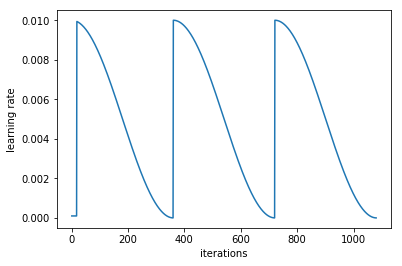

In [35]:
learn.sched.plot_lr()

Since validation loss is not improving much we freeze final layer here. We save it so that it can be reloaded.

In [36]:
learn.save('JPlastlayer')

In [37]:
learn.load('JPlastlayer')

### Fine-tuning and differential learning rate annealing

Once final layer is frozen, the other pre-trained layers are fine tuned. We use differential learning rates becuse earlier layers will need less fine tuning. Thumb rule: Last LR same as final layer rate and then divide by 10x successively. 

In [38]:
lr=np.array([1e-4,1e-3,1e-2])

In [39]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

  0%|          | 0/360 [00:02<?, ?it/s, loss=tensor(1.00000e-02 *
  0%|          | 1/360 [00:02<14:11,  2.37s/it, loss=tensor(1.00000e-02 *
       4.7711, device='cuda:0')]

/home/nbuser/courses/fastai/courses/dl1/fastai/model.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  return raw_loss.data[0]


  0%|          | 1/360 [00:02<16:08,  2.70s/it, loss=tensor(1.00000e-02 *
  1%|          | 2/360 [00:02<08:03,  1.35s/it, loss=tensor(1.00000e-02 *
  1%|          | 2/360 [00:03<08:59,  1.51s/it, loss=tensor(1.00000e-02 *
  1%|          | 3/360 [00:03<05:58,  1.00s/it, loss=tensor(1.00000e-02 *
  1%|          | 3/360 [00:03<06:36,  1.11s/it, loss=tensor(1.00000e-02 *
  1%|          | 4/360 [00:03<04:56,  1.20it/s, loss=tensor(1.00000e-02 *
  1%|          | 4/360 [00:03<05:24,  1.10it/s, loss=tensor(1.00000e-02 *
  1%|▏         | 5/360 [00:03<04:19,  1.37it/s, loss=tensor(1.00000e-02 *
  1%|▏         | 5/360 [00:03<04:42,  1.26it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 6/360 [00:03<03:55,  1.51it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 6/360 [00:04<04:13,  1.39it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 7/360 [00:04<03:37,  1.62it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 7/360 [00:04<03:53,  1.51it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 8/360 [00:04<03:24,  

 16%|█▌        | 56/360 [00:20<01:51,  2.73it/s, loss=tensor(1.00000e-02 *
 16%|█▌        | 57/360 [00:20<01:49,  2.78it/s, loss=tensor(1.00000e-02 *
 16%|█▌        | 57/360 [00:20<01:50,  2.73it/s, loss=tensor(1.00000e-02 *
 16%|█▌        | 58/360 [00:20<01:48,  2.78it/s, loss=tensor(1.00000e-02 *
 16%|█▌        | 58/360 [00:21<01:50,  2.74it/s, loss=tensor(1.00000e-02 *
 16%|█▋        | 59/360 [00:21<01:48,  2.79it/s, loss=tensor(1.00000e-02 *
 16%|█▋        | 59/360 [00:21<01:49,  2.74it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 60/360 [00:21<01:47,  2.79it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 60/360 [00:21<01:49,  2.75it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 61/360 [00:21<01:46,  2.80it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 61/360 [00:22<01:48,  2.76it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 62/360 [00:22<01:46,  2.80it/s, loss=tensor(1.00000e-02 *
 17%|█▋        | 62/360 [00:22<01:47,  2.76it/s, loss=tensor(1.00000e-02 *
 18%|█▊        | 63/360 [

 31%|███       | 111/360 [00:38<01:25,  2.91it/s, loss=tensor(1.00000e-02 *
 31%|███       | 111/360 [00:38<01:26,  2.88it/s, loss=tensor(1.00000e-02 *
 31%|███       | 112/360 [00:38<01:25,  2.91it/s, loss=tensor(1.00000e-02 *
 31%|███       | 112/360 [00:38<01:25,  2.88it/s, loss=tensor(1.00000e-02 *
 31%|███▏      | 113/360 [00:38<01:24,  2.91it/s, loss=tensor(1.00000e-02 *
 31%|███▏      | 113/360 [00:39<01:25,  2.89it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 114/360 [00:39<01:24,  2.91it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 114/360 [00:39<01:25,  2.89it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 115/360 [00:39<01:24,  2.91it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 115/360 [00:39<01:24,  2.89it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 116/360 [00:39<01:23,  2.91it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 116/360 [00:40<01:24,  2.89it/s, loss=tensor(1.00000e-02 *
 32%|███▎      | 117/360 [00:40<01:23,  2.92it/s, loss=tensor(1.00000e-02 *
 32%|███▎   

 46%|████▌     | 165/360 [00:55<01:05,  2.96it/s, loss=tensor(1.00000e-02 *
 46%|████▌     | 165/360 [00:56<01:06,  2.94it/s, loss=tensor(1.00000e-02 *
 46%|████▌     | 166/360 [00:56<01:05,  2.96it/s, loss=tensor(1.00000e-02 *
 46%|████▌     | 166/360 [00:56<01:05,  2.94it/s, loss=tensor(1.00000e-02 *
 46%|████▋     | 167/360 [00:56<01:05,  2.96it/s, loss=tensor(1.00000e-02 *
 46%|████▋     | 167/360 [00:56<01:05,  2.94it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 168/360 [00:56<01:04,  2.96it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 168/360 [00:57<01:05,  2.94it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 169/360 [00:57<01:04,  2.96it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 169/360 [00:57<01:04,  2.94it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 170/360 [00:57<01:04,  2.96it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 170/360 [00:57<01:04,  2.94it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 171/360 [00:57<01:03,  2.96it/s, loss=tensor(1.00000e-02 *
 48%|████▊  

 61%|██████    | 219/360 [01:13<00:47,  2.98it/s, loss=tensor(1.00000e-02 *
 61%|██████    | 219/360 [01:13<00:47,  2.97it/s, loss=tensor(1.00000e-02 *
 61%|██████    | 220/360 [01:13<00:46,  2.98it/s, loss=tensor(1.00000e-02 *
 61%|██████    | 220/360 [01:14<00:47,  2.97it/s, loss=tensor(1.00000e-02 *
 61%|██████▏   | 221/360 [01:14<00:46,  2.98it/s, loss=tensor(1.00000e-02 *
 61%|██████▏   | 221/360 [01:14<00:46,  2.97it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 222/360 [01:14<00:46,  2.98it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 222/360 [01:14<00:46,  2.97it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 223/360 [01:14<00:45,  2.98it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 223/360 [01:15<00:46,  2.97it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 224/360 [01:15<00:45,  2.98it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 224/360 [01:15<00:45,  2.97it/s, loss=tensor(1.00000e-02 *
 62%|██████▎   | 225/360 [01:15<00:45,  2.98it/s, loss=tensor(1.00000e-02 *
 62%|██████▎

 76%|███████▌  | 273/360 [01:31<00:29,  3.00it/s, loss=tensor(1.00000e-02 *
 76%|███████▌  | 273/360 [01:31<00:29,  2.99it/s, loss=tensor(1.00000e-02 *
 76%|███████▌  | 274/360 [01:31<00:28,  3.00it/s, loss=tensor(1.00000e-02 *
 76%|███████▌  | 274/360 [01:31<00:28,  2.99it/s, loss=tensor(1.00000e-02 *
 76%|███████▋  | 275/360 [01:31<00:28,  3.00it/s, loss=tensor(1.00000e-02 *
 76%|███████▋  | 275/360 [01:32<00:28,  2.99it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 276/360 [01:32<00:28,  3.00it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 276/360 [01:32<00:28,  2.99it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 277/360 [01:32<00:27,  3.00it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 277/360 [01:32<00:27,  2.99it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 278/360 [01:32<00:27,  3.00it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 278/360 [01:33<00:27,  2.99it/s, loss=tensor(1.00000e-02 *
 78%|███████▊  | 279/360 [01:33<00:27,  3.00it/s, loss=tensor(1.00000e-02 *
 78%|███████

 91%|█████████ | 327/360 [01:48<00:10,  3.02it/s, loss=tensor(1.00000e-02 *
 91%|█████████ | 327/360 [01:48<00:10,  3.01it/s, loss=tensor(1.00000e-02 *
 91%|█████████ | 328/360 [01:48<00:10,  3.02it/s, loss=tensor(1.00000e-02 *
 91%|█████████ | 328/360 [01:49<00:10,  3.01it/s, loss=tensor(1.00000e-02 *
 91%|█████████▏| 329/360 [01:49<00:10,  3.02it/s, loss=tensor(1.00000e-02 *
 91%|█████████▏| 329/360 [01:49<00:10,  3.01it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 330/360 [01:49<00:09,  3.02it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 330/360 [01:49<00:09,  3.01it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 331/360 [01:49<00:09,  3.02it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 331/360 [01:49<00:09,  3.01it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 332/360 [01:49<00:09,  3.02it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 332/360 [01:50<00:09,  3.01it/s, loss=tensor(1.00000e-02 *
 92%|█████████▎| 333/360 [01:50<00:08,  3.02it/s, loss=tensor(1.00000e-02 *
 92%|███████

  6%|▌         | 20/360 [00:08<02:28,  2.29it/s, loss=tensor(1.00000e-02 *
  6%|▌         | 21/360 [00:08<02:20,  2.41it/s, loss=tensor(1.00000e-02 *
  6%|▌         | 21/360 [00:09<02:26,  2.32it/s, loss=tensor(1.00000e-02 *
  6%|▌         | 22/360 [00:09<02:19,  2.43it/s, loss=tensor(1.00000e-02 *
  6%|▌         | 22/360 [00:09<02:23,  2.35it/s, loss=tensor(1.00000e-02 *
  6%|▋         | 23/360 [00:09<02:17,  2.45it/s, loss=tensor(1.00000e-02 *
  6%|▋         | 23/360 [00:09<02:22,  2.37it/s, loss=tensor(1.00000e-02 *
  7%|▋         | 24/360 [00:09<02:15,  2.47it/s, loss=tensor(1.00000e-02 *
  7%|▋         | 24/360 [00:10<02:20,  2.39it/s, loss=tensor(1.00000e-02 *
  7%|▋         | 25/360 [00:10<02:14,  2.49it/s, loss=tensor(1.00000e-02 *
  7%|▋         | 25/360 [00:10<02:19,  2.41it/s, loss=tensor(1.00000e-02 *
  7%|▋         | 26/360 [00:10<02:13,  2.50it/s, loss=tensor(1.00000e-02 *
  7%|▋         | 26/360 [00:10<02:17,  2.43it/s, loss=tensor(1.00000e-02 *
  8%|▊         | 27/360 [

 36%|███▌      | 129/360 [00:44<01:20,  2.88it/s, loss=tensor(1.00000e-02 *
 36%|███▌      | 130/360 [00:44<01:19,  2.90it/s, loss=tensor(1.00000e-02 *
 36%|███▌      | 130/360 [00:45<01:19,  2.88it/s, loss=tensor(1.00000e-02 *
 36%|███▋      | 131/360 [00:45<01:18,  2.90it/s, loss=tensor(1.00000e-02 *
 36%|███▋      | 131/360 [00:45<01:19,  2.88it/s, loss=tensor(1.00000e-02 *
 37%|███▋      | 132/360 [00:45<01:18,  2.90it/s, loss=tensor(1.00000e-02 *
 37%|███▋      | 132/360 [00:45<01:19,  2.88it/s, loss=tensor(1.00000e-02 *
 37%|███▋      | 133/360 [00:45<01:18,  2.90it/s, loss=tensor(1.00000e-02 *
 37%|███▋      | 133/360 [00:46<01:18,  2.88it/s, loss=tensor(1.00000e-02 *
 37%|███▋      | 134/360 [00:46<01:17,  2.90it/s, loss=tensor(1.00000e-02 *
 37%|███▋      | 134/360 [00:46<01:18,  2.88it/s, loss=tensor(1.00000e-02 *
 38%|███▊      | 135/360 [00:46<01:17,  2.90it/s, loss=tensor(1.00000e-02 *
 38%|███▊      | 135/360 [00:46<01:18,  2.88it/s, loss=tensor(1.00000e-02 *
 38%|███▊   

 51%|█████     | 183/360 [01:02<01:00,  2.92it/s, loss=tensor(1.00000e-02 *
 51%|█████     | 184/360 [01:02<01:00,  2.93it/s, loss=tensor(1.00000e-02 *
 51%|█████     | 184/360 [01:03<01:00,  2.92it/s, loss=tensor(1.00000e-02 *
 51%|█████▏    | 185/360 [01:03<00:59,  2.93it/s, loss=tensor(1.00000e-02 *
 51%|█████▏    | 185/360 [01:03<00:59,  2.92it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 186/360 [01:03<00:59,  2.93it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 186/360 [01:03<00:59,  2.92it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 187/360 [01:03<00:58,  2.93it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 187/360 [01:04<00:59,  2.92it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 188/360 [01:04<00:58,  2.93it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 188/360 [01:04<00:58,  2.92it/s, loss=tensor(1.00000e-02 *
 52%|█████▎    | 189/360 [01:04<00:58,  2.93it/s, loss=tensor(1.00000e-02 *
 52%|█████▎    | 189/360 [01:04<00:58,  2.92it/s, loss=tensor(1.00000e-02 *
 53%|█████▎ 

 66%|██████▌   | 237/360 [01:20<00:41,  2.95it/s, loss=tensor(1.00000e-02 *
 66%|██████▌   | 238/360 [01:20<00:41,  2.96it/s, loss=tensor(1.00000e-02 *
 66%|██████▌   | 238/360 [01:20<00:41,  2.95it/s, loss=tensor(1.00000e-02 *
 66%|██████▋   | 239/360 [01:20<00:40,  2.96it/s, loss=tensor(1.00000e-02 *
 66%|██████▋   | 239/360 [01:21<00:41,  2.94it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 240/360 [01:21<00:40,  2.96it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 240/360 [01:21<00:40,  2.95it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 241/360 [01:21<00:40,  2.96it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 241/360 [01:21<00:40,  2.95it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 242/360 [01:21<00:39,  2.96it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 242/360 [01:22<00:40,  2.95it/s, loss=tensor(1.00000e-02 *
 68%|██████▊   | 243/360 [01:22<00:39,  2.96it/s, loss=tensor(1.00000e-02 *
 68%|██████▊   | 243/360 [01:22<00:39,  2.95it/s, loss=tensor(1.00000e-02 *
 68%|██████▊

 81%|████████  | 291/360 [01:38<00:23,  2.96it/s, loss=tensor(1.00000e-02 *
 81%|████████  | 292/360 [01:38<00:22,  2.97it/s, loss=tensor(1.00000e-02 *
 81%|████████  | 292/360 [01:38<00:22,  2.96it/s, loss=tensor(1.00000e-02 *
 81%|████████▏ | 293/360 [01:38<00:22,  2.97it/s, loss=tensor(1.00000e-02 *
 81%|████████▏ | 293/360 [01:38<00:22,  2.96it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 294/360 [01:38<00:22,  2.97it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 294/360 [01:39<00:22,  2.96it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 295/360 [01:39<00:21,  2.97it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 295/360 [01:39<00:21,  2.96it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 296/360 [01:39<00:21,  2.97it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 296/360 [01:39<00:21,  2.96it/s, loss=tensor(1.00000e-02 *
 82%|████████▎ | 297/360 [01:39<00:21,  2.97it/s, loss=tensor(1.00000e-02 *
 82%|████████▎ | 297/360 [01:40<00:21,  2.96it/s, loss=tensor(1.00000e-02 *
 83%|███████

 96%|█████████▌| 345/360 [01:54<00:04,  3.01it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 346/360 [01:54<00:04,  3.02it/s, loss=tensor(1.00000e-02 *
 96%|█████████▌| 346/360 [01:54<00:04,  3.01it/s, loss=tensor(1.00000e-02 *
 96%|█████████▋| 347/360 [01:54<00:04,  3.02it/s, loss=tensor(1.00000e-02 *
 96%|█████████▋| 347/360 [01:55<00:04,  3.01it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 348/360 [01:55<00:03,  3.02it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 348/360 [01:55<00:03,  3.01it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 349/360 [01:55<00:03,  3.02it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 349/360 [01:55<00:03,  3.01it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 350/360 [01:55<00:03,  3.02it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 350/360 [01:56<00:03,  3.01it/s, loss=tensor(1.00000e-02 *
 98%|█████████▊| 351/360 [01:56<00:02,  3.02it/s, loss=tensor(1.00000e-02 *
 98%|█████████▊| 351/360 [01:56<00:02,  3.01it/s, loss=tensor(1.00000e-02 *
 98%|███████

 11%|█         | 39/360 [00:15<02:04,  2.57it/s, loss=tensor(1.00000e-02 *
 11%|█         | 40/360 [00:15<02:01,  2.64it/s, loss=tensor(1.00000e-02 *
 11%|█         | 40/360 [00:15<02:04,  2.58it/s, loss=tensor(1.00000e-02 *
 11%|█▏        | 41/360 [00:15<02:00,  2.64it/s, loss=tensor(1.00000e-02 *
 11%|█▏        | 41/360 [00:15<02:03,  2.59it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 42/360 [00:15<02:00,  2.65it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 42/360 [00:16<02:02,  2.59it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 43/360 [00:16<01:59,  2.66it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 43/360 [00:16<02:01,  2.60it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 44/360 [00:16<01:58,  2.66it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 44/360 [00:16<02:00,  2.61it/s, loss=tensor(1.00000e-02 *
 12%|█▎        | 45/360 [00:16<01:57,  2.67it/s, loss=tensor(1.00000e-02 *
 12%|█▎        | 45/360 [00:17<02:00,  2.62it/s, loss=tensor(1.00000e-02 *
 13%|█▎        | 46/360 [

 41%|████      | 148/360 [00:50<01:12,  2.93it/s, loss=tensor(1.00000e-02 *
 41%|████      | 148/360 [00:50<01:12,  2.91it/s, loss=tensor(1.00000e-02 *
 41%|████▏     | 149/360 [00:50<01:12,  2.93it/s, loss=tensor(1.00000e-02 *
 41%|████▏     | 149/360 [00:51<01:12,  2.91it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 150/360 [00:51<01:11,  2.93it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 150/360 [00:51<01:12,  2.91it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:51<01:11,  2.93it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:51<01:11,  2.91it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 152/360 [00:51<01:11,  2.93it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 152/360 [00:52<01:11,  2.91it/s, loss=tensor(1.00000e-02 *
 42%|████▎     | 153/360 [00:52<01:10,  2.93it/s, loss=tensor(1.00000e-02 *
 42%|████▎     | 153/360 [00:52<01:11,  2.91it/s, loss=tensor(1.00000e-02 *
 43%|████▎     | 154/360 [00:52<01:10,  2.93it/s, loss=tensor(1.00000e-02 *
 43%|████▎  

 56%|█████▌    | 202/360 [01:08<00:53,  2.95it/s, loss=tensor(1.00000e-02 *
 56%|█████▌    | 202/360 [01:08<00:53,  2.94it/s, loss=tensor(1.00000e-02 *
 56%|█████▋    | 203/360 [01:08<00:53,  2.96it/s, loss=tensor(1.00000e-02 *
 56%|█████▋    | 203/360 [01:08<00:53,  2.94it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 204/360 [01:08<00:52,  2.96it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 204/360 [01:09<00:52,  2.94it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 205/360 [01:09<00:52,  2.96it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 205/360 [01:09<00:52,  2.94it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 206/360 [01:09<00:52,  2.96it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 206/360 [01:09<00:52,  2.94it/s, loss=tensor(1.00000e-02 *
 57%|█████▊    | 207/360 [01:09<00:51,  2.96it/s, loss=tensor(1.00000e-02 *
 57%|█████▊    | 207/360 [01:10<00:51,  2.94it/s, loss=tensor(1.00000e-02 *
 58%|█████▊    | 208/360 [01:10<00:51,  2.96it/s, loss=tensor(1.00000e-02 *
 58%|█████▊ 

 71%|███████   | 256/360 [01:26<00:35,  2.97it/s, loss=tensor(1.00000e-02 *
 71%|███████   | 256/360 [01:26<00:35,  2.96it/s, loss=tensor(1.00000e-02 *
 71%|███████▏  | 257/360 [01:26<00:34,  2.97it/s, loss=tensor(1.00000e-02 *
 71%|███████▏  | 257/360 [01:26<00:34,  2.96it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 258/360 [01:26<00:34,  2.97it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 258/360 [01:27<00:34,  2.96it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 259/360 [01:27<00:34,  2.97it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 259/360 [01:27<00:34,  2.96it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 260/360 [01:27<00:33,  2.97it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 260/360 [01:27<00:33,  2.96it/s, loss=tensor(1.00000e-02 *
 72%|███████▎  | 261/360 [01:27<00:33,  2.97it/s, loss=tensor(1.00000e-02 *
 72%|███████▎  | 261/360 [01:28<00:33,  2.96it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [01:28<00:32,  2.97it/s, loss=tensor(1.00000e-02 *
 73%|███████

 86%|████████▌ | 310/360 [01:43<00:16,  2.99it/s, loss=tensor(1.00000e-02 *
 86%|████████▌ | 310/360 [01:44<00:16,  2.98it/s, loss=tensor(1.00000e-02 *
 86%|████████▋ | 311/360 [01:44<00:16,  2.99it/s, loss=tensor(1.00000e-02 *
 86%|████████▋ | 311/360 [01:44<00:16,  2.98it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 312/360 [01:44<00:16,  2.99it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 312/360 [01:44<00:16,  2.98it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 313/360 [01:44<00:15,  2.99it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 313/360 [01:45<00:15,  2.98it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 314/360 [01:45<00:15,  2.99it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 314/360 [01:45<00:15,  2.98it/s, loss=tensor(1.00000e-02 *
 88%|████████▊ | 315/360 [01:45<00:15,  2.99it/s, loss=tensor(1.00000e-02 *
 88%|████████▊ | 315/360 [01:45<00:15,  2.98it/s, loss=tensor(1.00000e-02 *
 88%|████████▊ | 316/360 [01:45<00:14,  2.99it/s, loss=tensor(1.00000e-02 *
 88%|███████

  1%|          | 3/360 [00:03<06:30,  1.09s/it, loss=tensor(1.00000e-02 *
  1%|          | 4/360 [00:03<04:52,  1.22it/s, loss=tensor(1.00000e-02 *
  1%|          | 4/360 [00:03<05:21,  1.11it/s, loss=tensor(1.00000e-02 *
  1%|▏         | 5/360 [00:03<04:16,  1.38it/s, loss=tensor(1.00000e-02 *
  1%|▏         | 5/360 [00:03<04:40,  1.27it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 6/360 [00:03<03:53,  1.52it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 6/360 [00:04<04:12,  1.40it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 7/360 [00:04<03:35,  1.63it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 7/360 [00:04<03:51,  1.52it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 8/360 [00:04<03:22,  1.74it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 8/360 [00:04<03:36,  1.63it/s, loss=tensor(1.00000e-02 *
  2%|▎         | 9/360 [00:04<03:12,  1.83it/s, loss=tensor(1.00000e-02 *
  2%|▎         | 9/360 [00:05<03:24,  1.72it/s, loss=tensor(1.00000e-02 *
  3%|▎         | 10/360 [00:05<03:03, 

 31%|███       | 112/360 [00:39<01:26,  2.85it/s, loss=tensor(1.00000e-02 *
 31%|███▏      | 113/360 [00:39<01:25,  2.88it/s, loss=tensor(1.00000e-02 *
 31%|███▏      | 113/360 [00:39<01:26,  2.85it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 114/360 [00:39<01:25,  2.88it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 114/360 [00:39<01:26,  2.86it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 115/360 [00:39<01:25,  2.88it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 115/360 [00:40<01:25,  2.86it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 116/360 [00:40<01:24,  2.88it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 116/360 [00:40<01:25,  2.86it/s, loss=tensor(1.00000e-02 *
 32%|███▎      | 117/360 [00:40<01:24,  2.88it/s, loss=tensor(1.00000e-02 *
 32%|███▎      | 117/360 [00:40<01:24,  2.86it/s, loss=tensor(1.00000e-02 *
 33%|███▎      | 118/360 [00:40<01:23,  2.88it/s, loss=tensor(1.00000e-02 *
 33%|███▎      | 118/360 [00:41<01:24,  2.86it/s, loss=tensor(1.00000e-02 *
 33%|███▎   

 46%|████▌     | 166/360 [00:57<01:06,  2.90it/s, loss=tensor(1.00000e-02 *
 46%|████▋     | 167/360 [00:57<01:06,  2.92it/s, loss=tensor(1.00000e-02 *
 46%|████▋     | 167/360 [00:57<01:06,  2.90it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 168/360 [00:57<01:05,  2.92it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 168/360 [00:57<01:06,  2.91it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 169/360 [00:57<01:05,  2.92it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 169/360 [00:58<01:05,  2.91it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 170/360 [00:58<01:04,  2.92it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 170/360 [00:58<01:05,  2.91it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 171/360 [00:58<01:04,  2.92it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 171/360 [00:58<01:04,  2.91it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 172/360 [00:58<01:04,  2.93it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 172/360 [00:59<01:04,  2.91it/s, loss=tensor(1.00000e-02 *
 48%|████▊  

 61%|██████    | 220/360 [01:15<00:47,  2.93it/s, loss=tensor(1.00000e-02 *
 61%|██████▏   | 221/360 [01:15<00:47,  2.94it/s, loss=tensor(1.00000e-02 *
 61%|██████▏   | 221/360 [01:15<00:47,  2.93it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 222/360 [01:15<00:46,  2.95it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 222/360 [01:15<00:47,  2.93it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 223/360 [01:15<00:46,  2.95it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 223/360 [01:16<00:46,  2.93it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 224/360 [01:16<00:46,  2.95it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 224/360 [01:16<00:46,  2.93it/s, loss=tensor(1.00000e-02 *
 62%|██████▎   | 225/360 [01:16<00:45,  2.95it/s, loss=tensor(1.00000e-02 *
 62%|██████▎   | 225/360 [01:16<00:46,  2.93it/s, loss=tensor(1.00000e-02 *
 63%|██████▎   | 226/360 [01:16<00:45,  2.95it/s, loss=tensor(1.00000e-02 *
 63%|██████▎   | 226/360 [01:17<00:45,  2.93it/s, loss=tensor(1.00000e-02 *
 63%|██████▎

 76%|███████▌  | 274/360 [01:32<00:29,  2.95it/s, loss=tensor(1.00000e-02 *
 76%|███████▋  | 275/360 [01:32<00:28,  2.96it/s, loss=tensor(1.00000e-02 *
 76%|███████▋  | 275/360 [01:33<00:28,  2.95it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 276/360 [01:33<00:28,  2.96it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 276/360 [01:33<00:28,  2.95it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 277/360 [01:33<00:28,  2.96it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 277/360 [01:33<00:28,  2.95it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 278/360 [01:33<00:27,  2.96it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 278/360 [01:34<00:27,  2.95it/s, loss=tensor(1.00000e-02 *
 78%|███████▊  | 279/360 [01:34<00:27,  2.96it/s, loss=tensor(1.00000e-02 *
 78%|███████▊  | 279/360 [01:34<00:27,  2.95it/s, loss=tensor(1.00000e-02 *
 78%|███████▊  | 280/360 [01:34<00:26,  2.96it/s, loss=tensor(1.00000e-02 *
 78%|███████▊  | 280/360 [01:34<00:27,  2.95it/s, loss=tensor(1.00000e-02 *
 78%|███████

 91%|█████████ | 328/360 [01:49<00:10,  2.99it/s, loss=tensor(1.00000e-02 *
 91%|█████████▏| 329/360 [01:49<00:10,  3.00it/s, loss=tensor(1.00000e-02 *
 91%|█████████▏| 329/360 [01:49<00:10,  2.99it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 330/360 [01:49<00:09,  3.00it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 330/360 [01:50<00:10,  2.99it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 331/360 [01:50<00:09,  3.00it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 331/360 [01:50<00:09,  2.99it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 332/360 [01:50<00:09,  3.00it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 332/360 [01:50<00:09,  3.00it/s, loss=tensor(1.00000e-02 *
 92%|█████████▎| 333/360 [01:50<00:08,  3.00it/s, loss=tensor(1.00000e-02 *
 92%|█████████▎| 333/360 [01:51<00:09,  3.00it/s, loss=tensor(1.00000e-02 *
 93%|█████████▎| 334/360 [01:51<00:08,  3.01it/s, loss=tensor(1.00000e-02 *
 93%|█████████▎| 334/360 [01:51<00:08,  3.00it/s, loss=tensor(1.00000e-02 *
 93%|███████

 21%|██        | 76/360 [00:27<01:42,  2.77it/s, loss=tensor(1.00000e-02 *
 21%|██▏       | 77/360 [00:27<01:40,  2.81it/s, loss=tensor(1.00000e-02 *
 21%|██▏       | 77/360 [00:27<01:41,  2.77it/s, loss=tensor(1.00000e-02 *
 22%|██▏       | 78/360 [00:27<01:40,  2.81it/s, loss=tensor(1.00000e-02 *
 22%|██▏       | 78/360 [00:28<01:41,  2.78it/s, loss=tensor(1.00000e-02 *
 22%|██▏       | 79/360 [00:28<01:39,  2.81it/s, loss=tensor(1.00000e-02 *
 22%|██▏       | 79/360 [00:28<01:41,  2.78it/s, loss=tensor(1.00000e-02 *
 22%|██▏       | 80/360 [00:28<01:39,  2.82it/s, loss=tensor(1.00000e-02 *
 22%|██▏       | 80/360 [00:28<01:40,  2.78it/s, loss=tensor(1.00000e-02 *
 22%|██▎       | 81/360 [00:28<01:38,  2.82it/s, loss=tensor(1.00000e-02 *
 22%|██▎       | 81/360 [00:29<01:40,  2.79it/s, loss=tensor(1.00000e-02 *
 23%|██▎       | 82/360 [00:29<01:38,  2.82it/s, loss=tensor(1.00000e-02 *
 23%|██▎       | 82/360 [00:29<01:39,  2.79it/s, loss=tensor(1.00000e-02 *
 23%|██▎       | 83/360 [

 51%|█████     | 184/360 [01:03<01:00,  2.92it/s, loss=tensor(1.00000e-02 *
 51%|█████▏    | 185/360 [01:03<00:59,  2.94it/s, loss=tensor(1.00000e-02 *
 51%|█████▏    | 185/360 [01:03<00:59,  2.92it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 186/360 [01:03<00:59,  2.94it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 186/360 [01:03<00:59,  2.92it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 187/360 [01:03<00:58,  2.94it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 187/360 [01:04<00:59,  2.92it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 188/360 [01:04<00:58,  2.94it/s, loss=tensor(1.00000e-02 *
 52%|█████▏    | 188/360 [01:04<00:58,  2.92it/s, loss=tensor(1.00000e-02 *
 52%|█████▎    | 189/360 [01:04<00:58,  2.94it/s, loss=tensor(1.00000e-02 *
 52%|█████▎    | 189/360 [01:04<00:58,  2.92it/s, loss=tensor(1.00000e-02 *
 53%|█████▎    | 190/360 [01:04<00:57,  2.94it/s, loss=tensor(1.00000e-02 *
 53%|█████▎    | 190/360 [01:04<00:58,  2.92it/s, loss=tensor(1.00000e-02 *
 53%|█████▎ 

 66%|██████▌   | 238/360 [01:20<00:41,  2.95it/s, loss=tensor(1.00000e-02 *
 66%|██████▋   | 239/360 [01:20<00:40,  2.96it/s, loss=tensor(1.00000e-02 *
 66%|██████▋   | 239/360 [01:20<00:40,  2.95it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 240/360 [01:20<00:40,  2.96it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 240/360 [01:21<00:40,  2.95it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 241/360 [01:21<00:40,  2.96it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 241/360 [01:21<00:40,  2.95it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 242/360 [01:21<00:39,  2.96it/s, loss=tensor(1.00000e-02 *
 67%|██████▋   | 242/360 [01:21<00:39,  2.95it/s, loss=tensor(1.00000e-02 *
 68%|██████▊   | 243/360 [01:21<00:39,  2.96it/s, loss=tensor(1.00000e-02 *
 68%|██████▊   | 243/360 [01:22<00:39,  2.95it/s, loss=tensor(1.00000e-02 *
 68%|██████▊   | 244/360 [01:22<00:39,  2.96it/s, loss=tensor(1.00000e-02 *
 68%|██████▊   | 244/360 [01:22<00:39,  2.95it/s, loss=tensor(1.00000e-02 *
 68%|██████▊

 81%|████████  | 292/360 [01:38<00:22,  2.96it/s, loss=tensor(1.00000e-02 *
 81%|████████▏ | 293/360 [01:38<00:22,  2.97it/s, loss=tensor(1.00000e-02 *
 81%|████████▏ | 293/360 [01:38<00:22,  2.96it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 294/360 [01:38<00:22,  2.97it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 294/360 [01:39<00:22,  2.96it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 295/360 [01:39<00:21,  2.97it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 295/360 [01:39<00:21,  2.96it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 296/360 [01:39<00:21,  2.97it/s, loss=tensor(1.00000e-02 *
 82%|████████▏ | 296/360 [01:39<00:21,  2.96it/s, loss=tensor(1.00000e-02 *
 82%|████████▎ | 297/360 [01:39<00:21,  2.97it/s, loss=tensor(1.00000e-02 *
 82%|████████▎ | 297/360 [01:40<00:21,  2.96it/s, loss=tensor(1.00000e-02 *
 83%|████████▎ | 298/360 [01:40<00:20,  2.97it/s, loss=tensor(1.00000e-02 *
 83%|████████▎ | 298/360 [01:40<00:20,  2.96it/s, loss=tensor(1.00000e-02 *
 83%|███████

 96%|█████████▌| 346/360 [01:55<00:04,  3.00it/s, loss=tensor(1.00000e-02 *
 96%|█████████▋| 347/360 [01:55<00:04,  3.01it/s, loss=tensor(1.00000e-02 *
 96%|█████████▋| 347/360 [01:55<00:04,  3.00it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 348/360 [01:55<00:03,  3.01it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 348/360 [01:55<00:03,  3.00it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 349/360 [01:55<00:03,  3.01it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 349/360 [01:56<00:03,  3.00it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 350/360 [01:56<00:03,  3.01it/s, loss=tensor(1.00000e-02 *
 97%|█████████▋| 350/360 [01:56<00:03,  3.01it/s, loss=tensor(1.00000e-02 *
 98%|█████████▊| 351/360 [01:56<00:02,  3.01it/s, loss=tensor(1.00000e-02 *
 98%|█████████▊| 351/360 [01:56<00:02,  3.01it/s, loss=tensor(1.00000e-02 *
 98%|█████████▊| 352/360 [01:56<00:02,  3.01it/s, loss=tensor(1.00000e-02 *
 98%|█████████▊| 352/360 [01:57<00:02,  3.01it/s, loss=tensor(1.00000e-02 *
 98%|███████

 11%|█         | 40/360 [00:15<02:04,  2.56it/s, loss=tensor(1.00000e-02 *
 11%|█▏        | 41/360 [00:15<02:01,  2.63it/s, loss=tensor(1.00000e-02 *
 11%|█▏        | 41/360 [00:15<02:04,  2.57it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 42/360 [00:15<02:00,  2.63it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 42/360 [00:16<02:03,  2.58it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 43/360 [00:16<01:59,  2.64it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 43/360 [00:16<02:02,  2.59it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 44/360 [00:16<01:59,  2.65it/s, loss=tensor(1.00000e-02 *
 12%|█▏        | 44/360 [00:16<02:01,  2.60it/s, loss=tensor(1.00000e-02 *
 12%|█▎        | 45/360 [00:16<01:58,  2.65it/s, loss=tensor(1.00000e-02 *
 12%|█▎        | 45/360 [00:17<02:01,  2.60it/s, loss=tensor(1.00000e-02 *
 13%|█▎        | 46/360 [00:17<01:58,  2.66it/s, loss=tensor(1.00000e-02 *
 13%|█▎        | 46/360 [00:17<02:00,  2.61it/s, loss=tensor(1.00000e-02 *
 13%|█▎        | 47/360 [

 41%|████▏     | 149/360 [00:51<01:12,  2.91it/s, loss=tensor(1.00000e-02 *
 41%|████▏     | 149/360 [00:51<01:12,  2.89it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 150/360 [00:51<01:12,  2.91it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 150/360 [00:51<01:12,  2.89it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:51<01:11,  2.91it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 151/360 [00:52<01:12,  2.89it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 152/360 [00:52<01:11,  2.91it/s, loss=tensor(1.00000e-02 *
 42%|████▏     | 152/360 [00:52<01:11,  2.90it/s, loss=tensor(1.00000e-02 *
 42%|████▎     | 153/360 [00:52<01:11,  2.91it/s, loss=tensor(1.00000e-02 *
 42%|████▎     | 153/360 [00:52<01:11,  2.90it/s, loss=tensor(1.00000e-02 *
 43%|████▎     | 154/360 [00:52<01:10,  2.91it/s, loss=tensor(1.00000e-02 *
 43%|████▎     | 154/360 [00:53<01:11,  2.90it/s, loss=tensor(1.00000e-02 *
 43%|████▎     | 155/360 [00:53<01:10,  2.91it/s, loss=tensor(1.00000e-02 *
 43%|████▎  

 56%|█████▋    | 203/360 [01:08<00:53,  2.94it/s, loss=tensor(1.00000e-02 *
 56%|█████▋    | 203/360 [01:09<00:53,  2.93it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 204/360 [01:09<00:52,  2.94it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 204/360 [01:09<00:53,  2.93it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 205/360 [01:09<00:52,  2.94it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 205/360 [01:09<00:52,  2.93it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 206/360 [01:09<00:52,  2.94it/s, loss=tensor(1.00000e-02 *
 57%|█████▋    | 206/360 [01:10<00:52,  2.93it/s, loss=tensor(1.00000e-02 *
 57%|█████▊    | 207/360 [01:10<00:51,  2.94it/s, loss=tensor(1.00000e-02 *
 57%|█████▊    | 207/360 [01:10<00:52,  2.93it/s, loss=tensor(1.00000e-02 *
 58%|█████▊    | 208/360 [01:10<00:51,  2.95it/s, loss=tensor(1.00000e-02 *
 58%|█████▊    | 208/360 [01:10<00:51,  2.93it/s, loss=tensor(1.00000e-02 *
 58%|█████▊    | 209/360 [01:10<00:51,  2.95it/s, loss=tensor(1.00000e-02 *
 58%|█████▊ 

 71%|███████▏  | 257/360 [01:26<00:34,  2.95it/s, loss=tensor(1.00000e-02 *
 71%|███████▏  | 257/360 [01:27<00:35,  2.94it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 258/360 [01:27<00:34,  2.95it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 258/360 [01:27<00:34,  2.94it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 259/360 [01:27<00:34,  2.95it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 259/360 [01:27<00:34,  2.94it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 260/360 [01:27<00:33,  2.96it/s, loss=tensor(1.00000e-02 *
 72%|███████▏  | 260/360 [01:28<00:33,  2.94it/s, loss=tensor(1.00000e-02 *
 72%|███████▎  | 261/360 [01:28<00:33,  2.96it/s, loss=tensor(1.00000e-02 *
 72%|███████▎  | 261/360 [01:28<00:33,  2.94it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [01:28<00:33,  2.96it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 262/360 [01:28<00:33,  2.94it/s, loss=tensor(1.00000e-02 *
 73%|███████▎  | 263/360 [01:28<00:32,  2.96it/s, loss=tensor(1.00000e-02 *
 73%|███████

 86%|████████▋ | 311/360 [01:44<00:16,  2.98it/s, loss=tensor(1.00000e-02 *
 86%|████████▋ | 311/360 [01:44<00:16,  2.97it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 312/360 [01:44<00:16,  2.98it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 312/360 [01:45<00:16,  2.97it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 313/360 [01:45<00:15,  2.98it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 313/360 [01:45<00:15,  2.97it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 314/360 [01:45<00:15,  2.98it/s, loss=tensor(1.00000e-02 *
 87%|████████▋ | 314/360 [01:45<00:15,  2.97it/s, loss=tensor(1.00000e-02 *
 88%|████████▊ | 315/360 [01:45<00:15,  2.98it/s, loss=tensor(1.00000e-02 *
 88%|████████▊ | 315/360 [01:45<00:15,  2.97it/s, loss=tensor(1.00000e-02 *
 88%|████████▊ | 316/360 [01:45<00:14,  2.98it/s, loss=tensor(1.00000e-02 *
 88%|████████▊ | 316/360 [01:46<00:14,  2.97it/s, loss=tensor(1.00000e-02 *
 88%|████████▊ | 317/360 [01:46<00:14,  2.98it/s, loss=tensor(1.00000e-02 *
 88%|███████

  1%|          | 4/360 [00:03<05:16,  1.13it/s, loss=tensor(1.00000e-02 *
  1%|▏         | 5/360 [00:03<04:12,  1.41it/s, loss=tensor(1.00000e-02 *
  1%|▏         | 5/360 [00:03<04:36,  1.28it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 6/360 [00:03<03:50,  1.54it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 6/360 [00:04<04:09,  1.42it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 7/360 [00:04<03:33,  1.66it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 7/360 [00:04<03:49,  1.54it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 8/360 [00:04<03:20,  1.76it/s, loss=tensor(1.00000e-02 *
  2%|▏         | 8/360 [00:04<03:35,  1.63it/s, loss=tensor(1.00000e-02 *
  2%|▎         | 9/360 [00:04<03:11,  1.84it/s, loss=tensor(1.00000e-02 *
  2%|▎         | 9/360 [00:05<03:23,  1.72it/s, loss=tensor(1.00000e-02 *
  3%|▎         | 10/360 [00:05<03:02,  1.91it/s, loss=tensor(1.00000e-02 *
  3%|▎         | 10/360 [00:05<03:14,  1.80it/s, loss=tensor(1.00000e-02 *
  3%|▎         | 11/360 [00:05<02:56

 31%|███▏      | 113/360 [00:39<01:26,  2.86it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 114/360 [00:39<01:25,  2.88it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 114/360 [00:39<01:26,  2.86it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 115/360 [00:39<01:24,  2.88it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 115/360 [00:40<01:25,  2.86it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 116/360 [00:40<01:24,  2.88it/s, loss=tensor(1.00000e-02 *
 32%|███▏      | 116/360 [00:40<01:25,  2.86it/s, loss=tensor(1.00000e-02 *
 32%|███▎      | 117/360 [00:40<01:24,  2.88it/s, loss=tensor(1.00000e-02 *
 32%|███▎      | 117/360 [00:40<01:24,  2.86it/s, loss=tensor(1.00000e-02 *
 33%|███▎      | 118/360 [00:40<01:23,  2.89it/s, loss=tensor(1.00000e-02 *
 33%|███▎      | 118/360 [00:41<01:24,  2.86it/s, loss=tensor(1.00000e-02 *
 33%|███▎      | 119/360 [00:41<01:23,  2.89it/s, loss=tensor(1.00000e-02 *
 33%|███▎      | 119/360 [00:41<01:24,  2.86it/s, loss=tensor(1.00000e-02 *
 33%|███▎   

 46%|████▋     | 167/360 [00:57<01:06,  2.92it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 168/360 [00:57<01:05,  2.94it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 168/360 [00:57<01:05,  2.92it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 169/360 [00:57<01:05,  2.94it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 169/360 [00:57<01:05,  2.92it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 170/360 [00:57<01:04,  2.94it/s, loss=tensor(1.00000e-02 *
 47%|████▋     | 170/360 [00:58<01:05,  2.92it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 171/360 [00:58<01:04,  2.94it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 171/360 [00:58<01:04,  2.92it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 172/360 [00:58<01:03,  2.94it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 172/360 [00:58<01:04,  2.92it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 173/360 [00:58<01:03,  2.94it/s, loss=tensor(1.00000e-02 *
 48%|████▊     | 173/360 [00:59<01:03,  2.92it/s, loss=tensor(1.00000e-02 *
 48%|████▊  

 61%|██████▏   | 221/360 [01:15<00:47,  2.94it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 222/360 [01:15<00:46,  2.96it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 222/360 [01:15<00:46,  2.94it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 223/360 [01:15<00:46,  2.96it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 223/360 [01:15<00:46,  2.95it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 224/360 [01:15<00:45,  2.96it/s, loss=tensor(1.00000e-02 *
 62%|██████▏   | 224/360 [01:16<00:46,  2.95it/s, loss=tensor(1.00000e-02 *
 62%|██████▎   | 225/360 [01:16<00:45,  2.96it/s, loss=tensor(1.00000e-02 *
 62%|██████▎   | 225/360 [01:16<00:45,  2.95it/s, loss=tensor(1.00000e-02 *
 63%|██████▎   | 226/360 [01:16<00:45,  2.96it/s, loss=tensor(1.00000e-02 *
 63%|██████▎   | 226/360 [01:16<00:45,  2.95it/s, loss=tensor(1.00000e-02 *
 63%|██████▎   | 227/360 [01:16<00:44,  2.96it/s, loss=tensor(1.00000e-02 *
 63%|██████▎   | 227/360 [01:17<00:45,  2.95it/s, loss=tensor(1.00000e-02 *
 63%|██████▎

 76%|███████▋  | 275/360 [01:32<00:28,  2.96it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 276/360 [01:32<00:28,  2.97it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 276/360 [01:33<00:28,  2.96it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 277/360 [01:33<00:27,  2.98it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 277/360 [01:33<00:27,  2.96it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 278/360 [01:33<00:27,  2.98it/s, loss=tensor(1.00000e-02 *
 77%|███████▋  | 278/360 [01:33<00:27,  2.97it/s, loss=tensor(1.00000e-02 *
 78%|███████▊  | 279/360 [01:33<00:27,  2.98it/s, loss=tensor(1.00000e-02 *
 78%|███████▊  | 279/360 [01:34<00:27,  2.97it/s, loss=tensor(1.00000e-02 *
 78%|███████▊  | 280/360 [01:34<00:26,  2.98it/s, loss=tensor(1.00000e-02 *
 78%|███████▊  | 280/360 [01:34<00:26,  2.97it/s, loss=tensor(1.00000e-02 *
 78%|███████▊  | 281/360 [01:34<00:26,  2.98it/s, loss=tensor(1.00000e-02 *
 78%|███████▊  | 281/360 [01:34<00:26,  2.97it/s, loss=tensor(1.00000e-02 *
 78%|███████

 91%|█████████▏| 329/360 [01:49<00:10,  3.00it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 330/360 [01:49<00:09,  3.01it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 330/360 [01:50<00:10,  3.00it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 331/360 [01:50<00:09,  3.01it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 331/360 [01:50<00:09,  3.00it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 332/360 [01:50<00:09,  3.01it/s, loss=tensor(1.00000e-02 *
 92%|█████████▏| 332/360 [01:50<00:09,  3.00it/s, loss=tensor(1.00000e-02 *
 92%|█████████▎| 333/360 [01:50<00:08,  3.01it/s, loss=tensor(1.00000e-02 *
 92%|█████████▎| 333/360 [01:50<00:08,  3.00it/s, loss=tensor(1.00000e-02 *
 93%|█████████▎| 334/360 [01:50<00:08,  3.01it/s, loss=tensor(1.00000e-02 *
 93%|█████████▎| 334/360 [01:51<00:08,  3.00it/s, loss=tensor(1.00000e-02 *
 93%|█████████▎| 335/360 [01:51<00:08,  3.01it/s, loss=tensor(1.00000e-02 *
 93%|█████████▎| 335/360 [01:51<00:08,  3.00it/s, loss=tensor(1.00000e-02 *
 93%|███████

[0.02246236, 0.9926758]

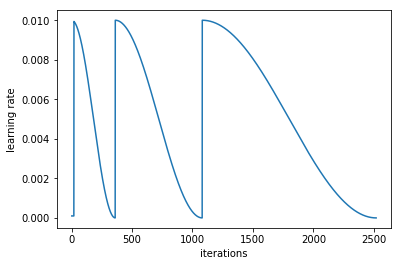

In [40]:
learn.sched.plot_lr()

The cycle_mult parameter = 2 is doubling the length of each cycle

In [41]:
learn.save('JP_all')

In [42]:
learn.load('JP_all')

Test time augmentation: makes predictions on a number of randomly augmented versions of image along with the original image. Use learner's TTA method.

In [43]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [44]:
accuracy_np(probs, y)

0.9935

Hence, TTA results in a 10 to 20% reduction in error.

### Confusion Matrix

In [45]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[995   5]
 [  8 992]]


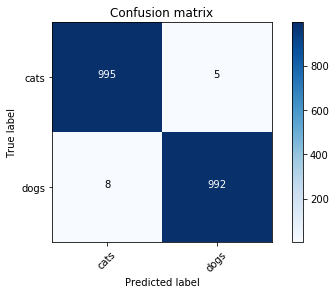

In [47]:
plot_confusion_matrix(cm, data.classes)

Most incorrect cats


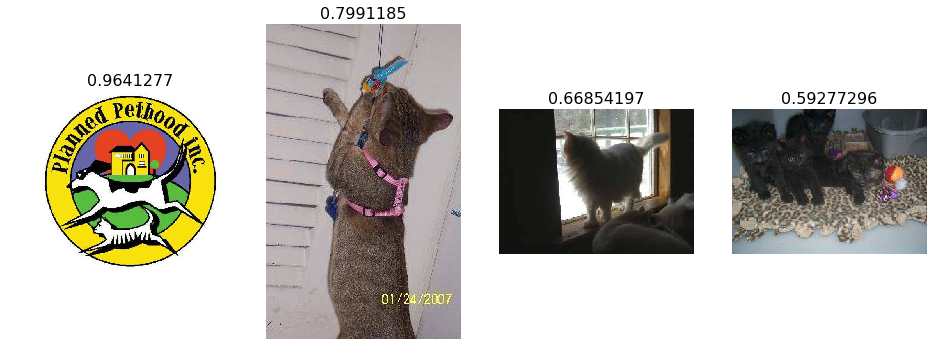

In [48]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


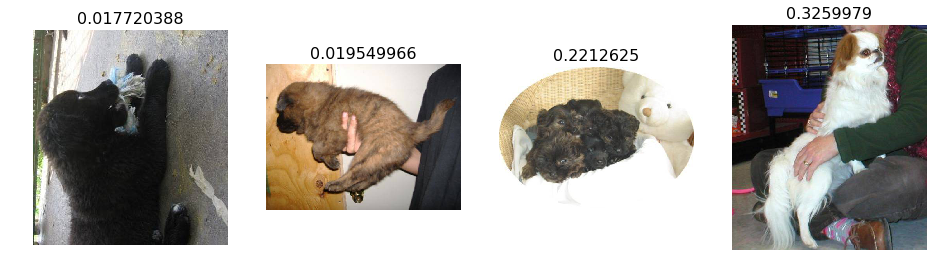

In [49]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")